CAR CLUSTERING

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Read in the data set

In [93]:
df = pd.read_csv('car_dataset.csv')
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [94]:
df.year.min()

1992

In [95]:
df.owner.value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [96]:
df.info

<bound method DataFrame.info of                                      name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007          60000      70000   
1                Maruti Wagon R LXI Minor  2007         135000      50000   
2                    Hyundai Verna 1.6 SX  2012         600000     100000   
3                  Datsun RediGO T Option  2017         250000      46000   
4                   Honda Amaze VX i-DTEC  2014         450000     141000   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014         409999      80000   
4336           Hyundai i20 Magna 1.4 CRDi  2014         409999      80000   
4337                  Maruti 800 AC BSIII  2009         110000      83000   
4338     Hyundai Creta 1.6 CRDi SX Option  2016         865000      90000   
4339                     Renault KWID RXT  2016         225000      40000   

        fuel seller_type transmission      

In [97]:
df.shape

(4340, 8)

In [98]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

C:\Users\Sai Kumar\annaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


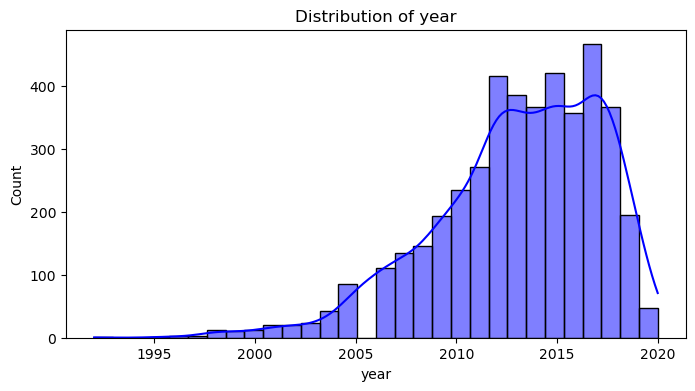

C:\Users\Sai Kumar\annaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


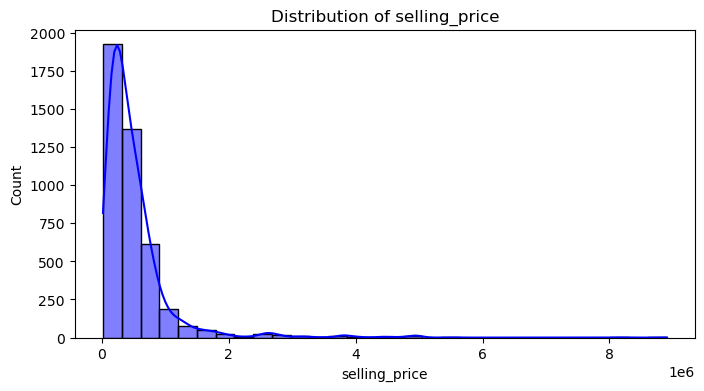

C:\Users\Sai Kumar\annaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


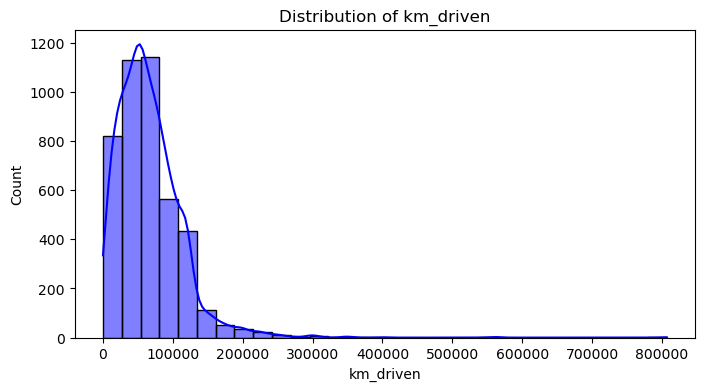

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plots for numerical features
numerical_features = ['year', 'selling_price', 'km_driven']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.show()


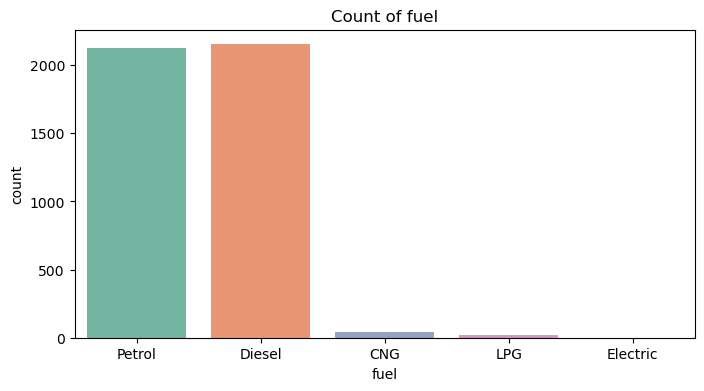

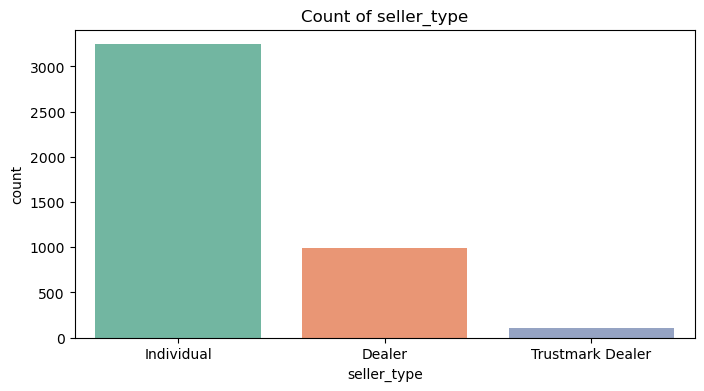

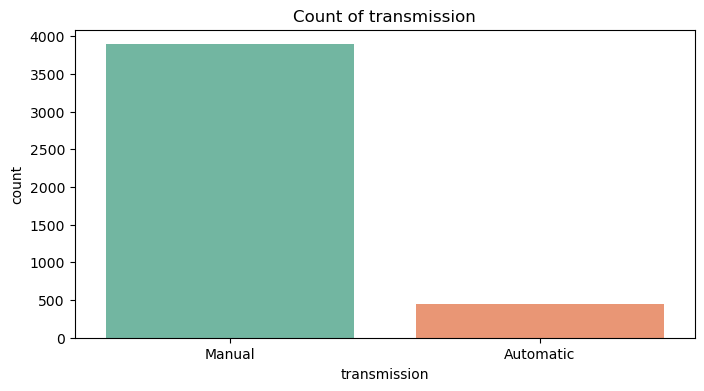

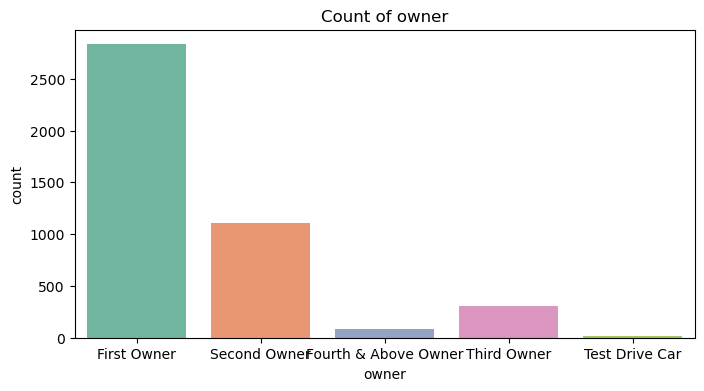

In [100]:
# Bar plots for categorical features
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, palette='Set2')
    plt.title(f"Count of {feature}")
    plt.show()


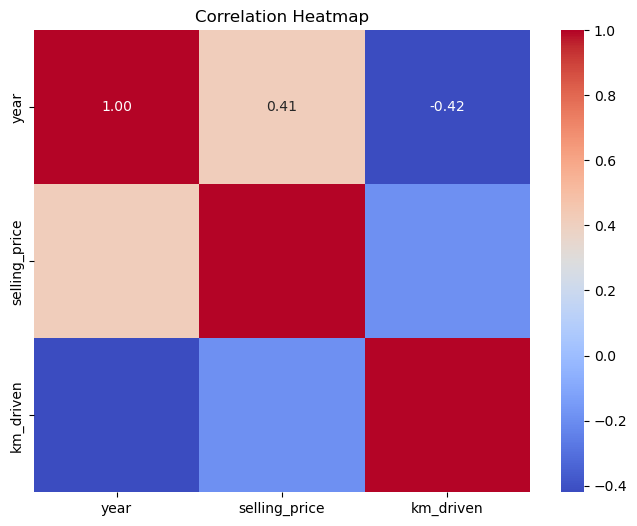

In [101]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [102]:
# One-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)
df.head()

,name,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,60000,70000,False,False,False,True,True,False,True,False,False,False,False
1,Maruti Wagon R LXI Minor,2007,135000,50000,False,False,False,True,True,False,True,False,False,False,False
2,Hyundai Verna 1.6 SX,2012,600000,100000,True,False,False,False,True,False,True,False,False,False,False
3,Datsun RediGO T Option,2017,250000,46000,False,False,False,True,True,False,True,False,False,False,False
4,Honda Amaze VX i-DTEC,2014,450000,141000,True,False,False,False,True,False,True,False,True,False,False


In [103]:
df=df.drop('name',axis=1)

In [104]:
df.head()

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,False,False,False,True,True,False,True,False,False,False,False
1,2007,135000,50000,False,False,False,True,True,False,True,False,False,False,False
2,2012,600000,100000,True,False,False,False,True,False,True,False,False,False,False
3,2017,250000,46000,False,False,False,True,True,False,True,False,False,False,False
4,2014,450000,141000,True,False,False,False,True,False,True,False,True,False,False


In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['year', 'selling_price', 'km_driven']] = scaler.fit_transform(df[['year', 'selling_price', 'km_driven']])


sns.pairplot(df)

## Dendograms

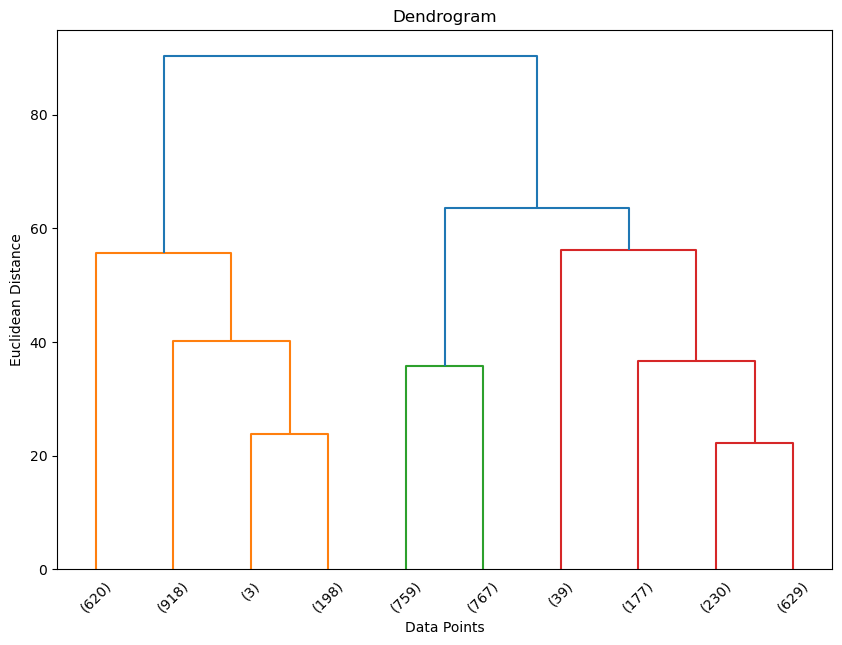

In [106]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Perform hierarchical clustering
linkage_matrix = linkage(df, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, leaf_rotation=45, leaf_font_size=10)
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


In [108]:
from sklearn.cluster import AgglomerativeClustering

Ac = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clusters = Ac.fit_predict(df)

# adding the labels to a column named label
df["label"] = clusters

df.head(4)

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,label
0,-1.445074,-0.767746,0.081139,False,False,False,True,True,False,True,False,False,False,False,3
1,-1.445074,-0.638096,-0.347689,False,False,False,True,True,False,True,False,False,False,False,1
2,-0.258795,0.165731,0.724381,True,False,False,False,True,False,True,False,False,False,False,0
3,0.927485,-0.439300,-0.433455,False,False,False,True,True,False,True,False,False,False,False,1


In [113]:
df_first_owner_electric = df[(df['fuel_Petrol'] == True) & (df['owner_Second Owner'] == True)]
df_first_owner_electric.label.value_counts()

label
3    289
1    228
0      7
2      5
Name: count, dtype: int64

In [44]:
df.label.value_counts()

label
2    1526
0    1119
1    1036
4     620
3      39
Name: count, dtype: int64

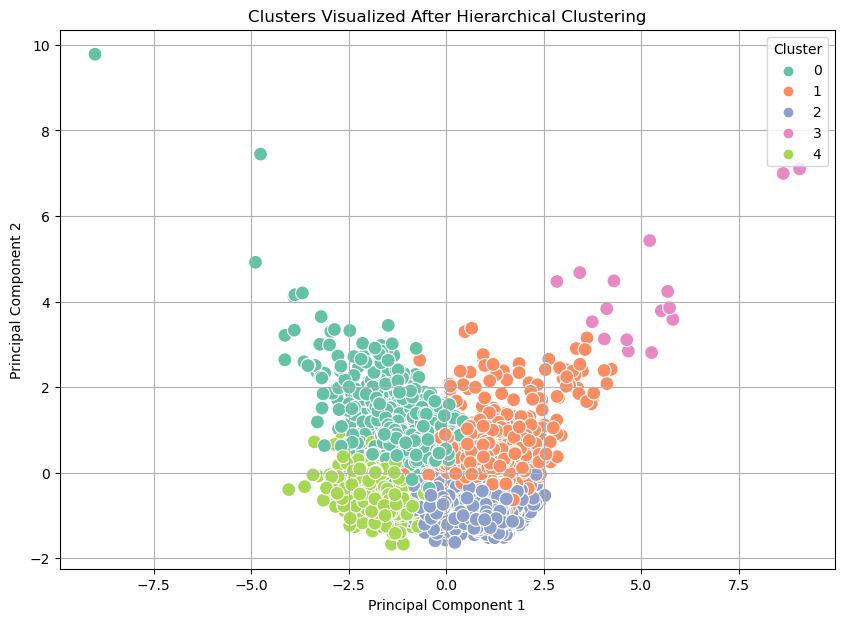

In [45]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df.drop('label', axis=1))

df['PCA1'], df['PCA2'] = reduced_data[:, 0], reduced_data[:, 1]

# Scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='label', data=df, palette='Set2', s=100)
plt.title("Clusters Visualized After Hierarchical Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()

In [46]:
df.head()

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,label,PCA1,PCA2
0,-1.445074,-0.767746,0.081139,False,False,False,True,True,False,True,False,False,False,False,4,-1.412355,-0.767877
1,-1.445074,-0.638096,-0.347689,False,False,False,True,True,False,True,False,False,False,False,2,-1.120177,-0.976224
2,-0.258795,0.165731,0.724381,True,False,False,False,True,False,True,False,False,False,False,0,-0.421161,0.897388
3,0.927485,-0.439300,-0.433455,False,False,False,True,True,False,True,False,False,False,False,2,0.541533,-0.893507
4,0.215717,-0.093568,1.603479,True,False,False,False,True,False,True,False,True,False,False,0,-0.821886,1.351829


In [47]:
# Calculate cluster centroids
centroids = np.array([df.drop('label',axis=1)[clusters == i].mean(axis=0) for i in np.unique(clusters)])

centroids

array([[-3.65019294e-01, -2.59134790e-01,  9.53280384e-01,
         9.81233244e-01,  0.00000000e+00,  3.57462020e-03,
         1.42984808e-02,  9.34763181e-01,  0.00000000e+00,
         9.72296693e-01,  3.12779267e-02,  3.72654155e-01,
         0.00000000e+00,  1.24218052e-01, -8.76542185e-01,
         8.08987747e-01],
       [ 6.39846278e-01,  6.80887724e-01, -3.62669421e-01,
         9.74903475e-01,  0.00000000e+00,  0.00000000e+00,
         2.12355212e-02,  5.26061776e-01,  4.63320463e-02,
         7.97297297e-01,  0.00000000e+00,  1.38996139e-01,
         7.72200772e-03,  1.44787645e-02,  1.03971971e+00,
         4.94459154e-01],
       [ 4.42245081e-01, -1.97942173e-01, -5.52818390e-01,
         0.00000000e+00,  0.00000000e+00,  1.11402359e-02,
         9.70511140e-01,  7.06422018e-01,  3.53866317e-02,
         9.09567497e-01,  3.93184797e-03,  1.63171691e-01,
         5.89777195e-03,  9.17431193e-03,  4.45422941e-01,
        -8.16762602e-01],
       [ 1.09173879e+00,  7.08029091e

In [48]:
df.label.value_counts()

label
2    1526
0    1119
1    1036
4     620
3      39
Name: count, dtype: int64

In [58]:
new_point = np.array([-1.445074, -0.767746, 0.081139, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0], dtype=float)


new_point = new_point.reshape(1, -1)


new_point_pca = pca.transform(new_point)

new_point = np.hstack([new_point, new_point_pca])

print("Augmented Point:", new_point)


Augmented Point: [[-1.445074   -0.767746    0.081139    0.          0.          0.
   1.          1.          0.          1.          0.          0.
   0.          0.         -1.41235449 -0.76787684]]


C:\Users\Sai Kumar\annaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [59]:
new_point = new_point[0]
new_point

array([-1.445074  , -0.767746  ,  0.081139  ,  0.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        , -1.41235449,
       -0.76787684])

In [60]:
from scipy.spatial.distance import cdist
distances = cdist([new_point], centroids)
assigned_cluster = np.argmin(distances)   # Adding 1 to match cluster indexing
print(f"New point is assigned to cluster: {assigned_cluster}")

New point is assigned to cluster: 4


In [61]:
import pickle
with open('aug_scaler','wb') as f:
    pickle.dump(scaler,f)

In [68]:
with open('aug_pca','wb') as f:
    pickle.dump(pca,f)


In [63]:
import pickle
import numpy as np

In [64]:
with open('aug_scaler','rb') as f:
    mp =pickle.load(f)
mp.transform([[2007,	60000,	70000]])

C:\Users\Sai Kumar\annaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.44507431, -0.76774602,  0.08113906]])

In [69]:
with open('aug_pca','rb') as f:
    pc =pickle.load(f)

In [71]:
new_point = np.array([-1.445074, -0.767746, 0.081139, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0], dtype=float)


new_point = new_point.reshape(1, -1)


new_point_pca = pc.transform(new_point)

new_point = np.hstack([new_point, new_point_pca])
print(new_point_pca)
print("Augmented Point:", new_point)


[[-1.41235449 -0.76787684]]
Augmented Point: [[-1.445074   -0.767746    0.081139    0.          0.          0.
   1.          1.          0.          1.          0.          0.
   0.          0.         -1.41235449 -0.76787684]]


C:\Users\Sai Kumar\annaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [75]:

distances = cdist(new_point, centroids)
assigned_cluster = np.argmin(distances)   # Adding 1 to match cluster indexing
print(f"New point is assigned to cluster: {assigned_cluster}")

New point is assigned to cluster: 4


In [85]:
def calculate_cluster(new_point):
    centroids = [[-3.65019294e-01, -2.59134790e-01,  9.53280384e-01,
         9.81233244e-01,  0.00000000e+00,  3.57462020e-03,
         1.42984808e-02,  9.34763181e-01,  0.00000000e+00,
         9.72296693e-01,  3.12779267e-02,  3.72654155e-01,
         0.00000000e+00,  1.24218052e-01, -8.76542185e-01,
         8.08987747e-01],
       [ 6.39846278e-01,  6.80887724e-01, -3.62669421e-01,
         9.74903475e-01,  0.00000000e+00,  0.00000000e+00,
         2.12355212e-02,  5.26061776e-01,  4.63320463e-02,
         7.97297297e-01,  0.00000000e+00,  1.38996139e-01,
         7.72200772e-03,  1.44787645e-02,  1.03971971e+00,
         4.94459154e-01],
       [ 4.42245081e-01, -1.97942173e-01, -5.52818390e-01,
         0.00000000e+00,  0.00000000e+00,  1.11402359e-02,
         9.70511140e-01,  7.06422018e-01,  3.53866317e-02,
         9.09567497e-01,  3.93184797e-03,  1.63171691e-01,
         5.89777195e-03,  9.17431193e-03,  4.45422941e-01,
        -8.16762602e-01],
       [ 1.09173879e+00,  7.08029091e+00, -7.66967038e-01,
         8.97435897e-01,  0.00000000e+00,  0.00000000e+00,
         1.02564103e-01,  2.05128205e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  5.12820513e-02,
         0.00000000e+00,  0.00000000e+00,  5.11356248e+00,
         3.82576248e+00],
       [-1.56752897e+00, -6.28224907e-01,  2.94382820e-01,
         1.61290323e-02,  1.61290323e-03,  3.22580645e-03,
         9.67741935e-01,  9.14516129e-01,  0.00000000e+00,
         9.51612903e-01,  6.45161290e-02,  4.74193548e-01,
         0.00000000e+00,  2.19354839e-01, -1.57329558e+00,
        -5.16680610e-01]]
    distances = cdist([new_point], centroids)
    assigned_cluster = np.argmin(distances)   # Adding 1 to match cluster indexing
    return assigned_cluster
with open('calculate_cluster','wb') as f:
    pickle.dump(calculate_cluster,f)   

In [86]:
with open('calculate_cluster','rb') as f:
    fun=pickle.load(f)   

In [87]:
fun([
    -1.4450743098747214,
    -0.7677460161789803,
    0.08113906042468783,
    0,
    0,
    0,
    1,
    1,
    0,
    1,
    0,
    0,
    0,
    0,
    -1.4123547298677492,
    -0.7678768159472756
  ]
)

4